In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
### Plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
# Template
import plotly.io as pio
pio.templates["draft"] = go.layout.Template(
    layout_annotations=[
        dict(
            textangle=-30,
            opacity=0.1,
            font=dict(color="black", size=100),
            xref="paper",
            yref="paper",
            x=0.5,
            y=0.5,
            showarrow=False,
        )
    ]
)
pio.templates.default = "draft"

In [34]:
data=pd.read_csv('ds_salaries.csv')

# DATA SIZE

In [35]:
data.shape

(607, 12)

# HOW IS DATA LOOKS LIKE

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


# Do Data have missing values?

In [37]:
data.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Checking the Dataset

In [38]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


**Here We Can See That The Data Is Not Clearly Readable Or We Have Data Like MI Or SE In experiencelevel So I Will Make It Readable Easily and same with the employment type and company size**

In [47]:
# We'll update some columns' values based on the data description
data["employment_type"] = data["employment_type"].replace({"FT": "Full Time", "PT": "Part Time", "CT": "Contract", "FL": "Freelance"})
data["company_size"] = data["company_size"].replace({"S": "Small", "M": "Medium", "L":"Large"})
data["experience_level"] = data["experience_level"].replace({"EN": "Entry Level/Junior", "MI": "Mid Level/Intermediate", "SE": "Senior Level/Expert", "EX": "Executive Level/Director"})

In [46]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Mid Level/Intermediate,Full Time,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,1,2020,Senior Level/Expert,Full Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2,2020,Senior Level/Expert,Full Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,3,2020,Mid Level/Intermediate,Full Time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,4,2020,Senior Level/Expert,Full Time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large


# Applying EDA

In [56]:
#Level Of Experience And Types Of Employes and Working Where 
annotations = []
x_positions = [0.007, 0.50, 0.98]

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],)
                    #subplot_titles=["<b>Employment Type</b>","<b>Experience Level</b>", "<b>Company Size</b>"])

for i, col in enumerate(["employment_type", "experience_level", "company_size"]):
    fig.add_trace(go.Pie(labels=data[col].value_counts().index,
                         values=data[col].value_counts().values,
                         marker=dict(line=dict(width=2.5)), textfont_size=15,
                         hole=.40, hovertemplate="%{label}: %{value}<extra></extra>"), 1, i+1)
    annotations.append(dict(text=f'<b>{col}</b>', x=x_positions[i], y=-0.1, font_size=20, showarrow=False))

fig.update_layout(title=f"<i>Information About Jobs Existing in the Dataset</i>", annotations=annotations)
fig.show()

**In this Dataset:**

- The big majority of jobs are Full Time (96.9%).
- Senior/Expert Level is the most present experience level.
- More than half of the companies in the dataset are large ones.

## Bar Plot:
A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. 

## Pie Chart:
A Pie Chart is a circular statistical plot that can display only one series of data. The area of the chart is the total percentage of the given data. The area of slices of the pie represents the percentage of the parts of the data.


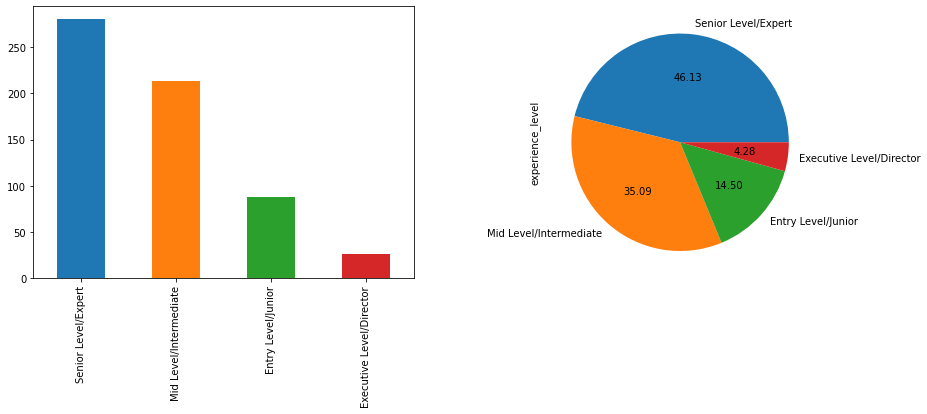

In [60]:
#level of Experience
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data['experience_level'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.subplot(1,2,2)
data['experience_level'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

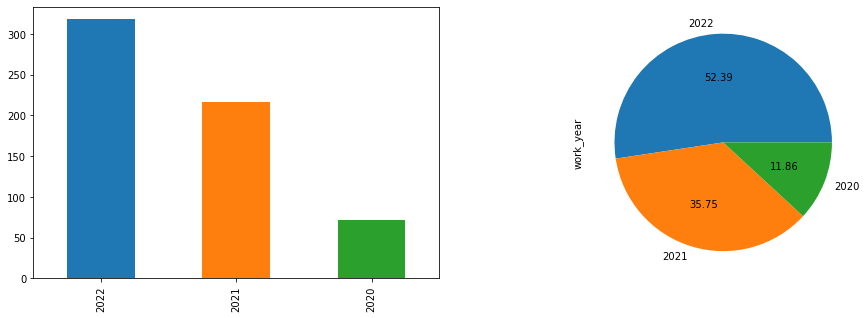

In [65]:
#employees in every year
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
df['work_year'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.subplot(1,2,2)
df['work_year'].value_counts().plot(kind='pie',autopct="%.2f")

plt.show()

<AxesSubplot:ylabel='remote_ratio'>

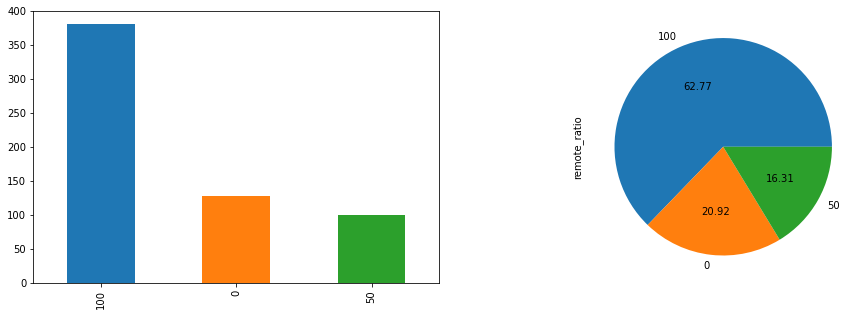

In [69]:
#remote jobs ratio
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
data['remote_ratio'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.subplot(1,2,2)
data['remote_ratio'].value_counts().plot(kind='pie',autopct="%.2f")

<AxesSubplot:ylabel='company_size'>

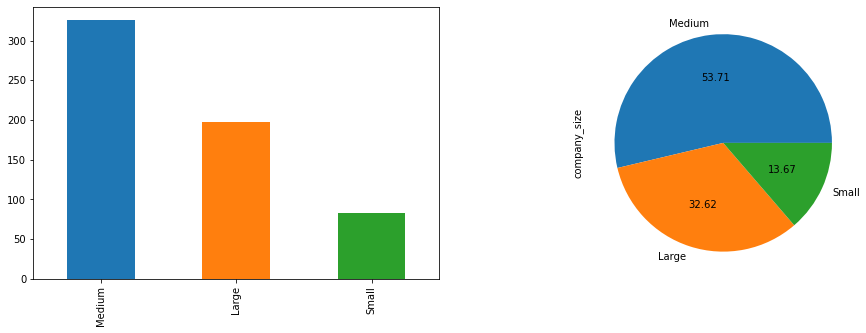

In [74]:
#company size
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
data['company_size'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.subplot(1,2,2)
data['company_size'].value_counts().plot(kind='pie',autopct="%.2f")

<AxesSubplot:>

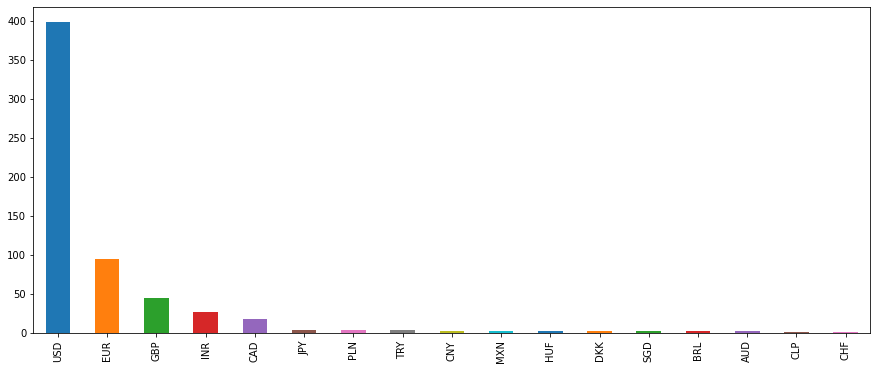

In [90]:
#company size
plt.figure(figsize=(33,6))
plt.subplot(1,2,1)
data['salary_currency'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))


<AxesSubplot:>

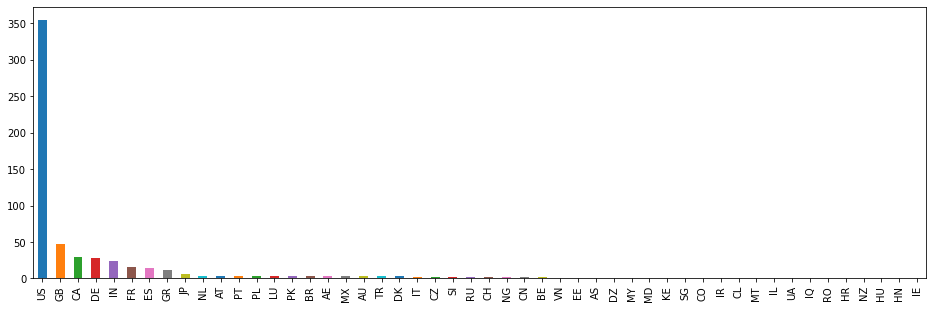

In [75]:
plt.figure(figsize=(16,5))
df['company_location'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))

<AxesSubplot:>

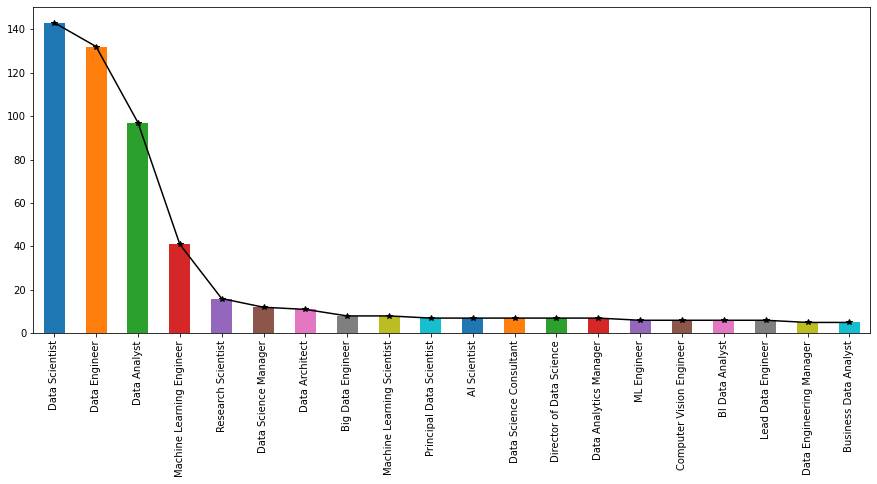

In [15]:
#job titles
plt.figure(figsize=(15,6))
df['job_title'].value_counts()[:20].plot(kind='line',color='black',marker="*")
df['job_title'].value_counts()[:20].plot(kind='bar',color=sns.color_palette("tab10"))

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

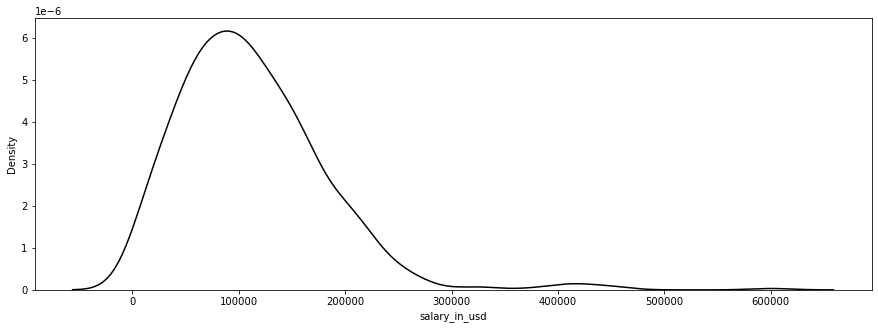

In [16]:
#distplot() function is used to plot the distplot. The distplot represents the univariate distribution of data i.e.
#data distribution of a variable against the density distribution.0
#right skwed outliear persent Salary columns

plt.figure(figsize=(15,5))
sns.distplot(df['salary_in_usd'],hist=False,color='black')

# **Bivariate/Multivariate Analysis**

**Numerical-Categorical**

In [17]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

**BOX_PLOT**


![]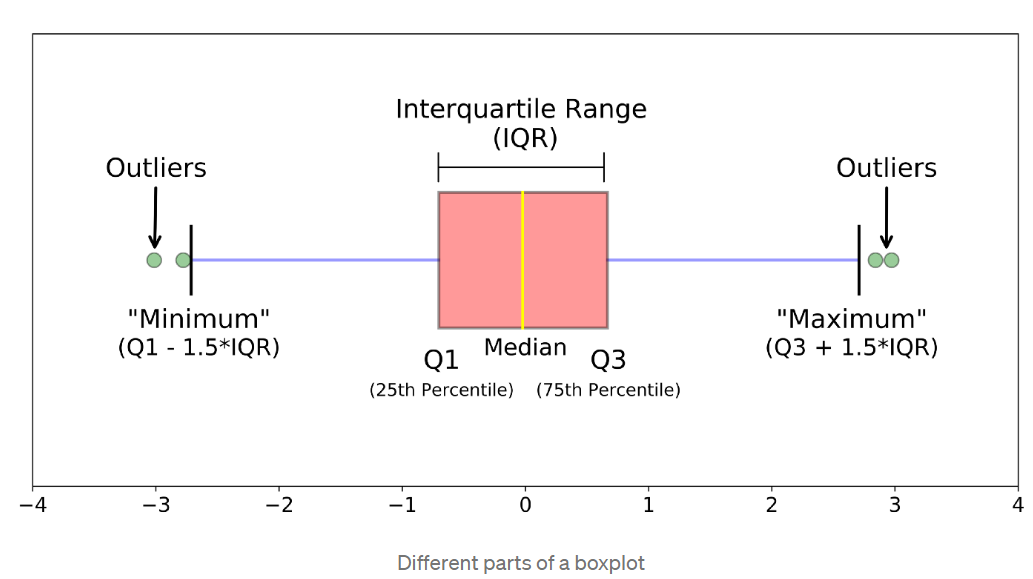

F:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


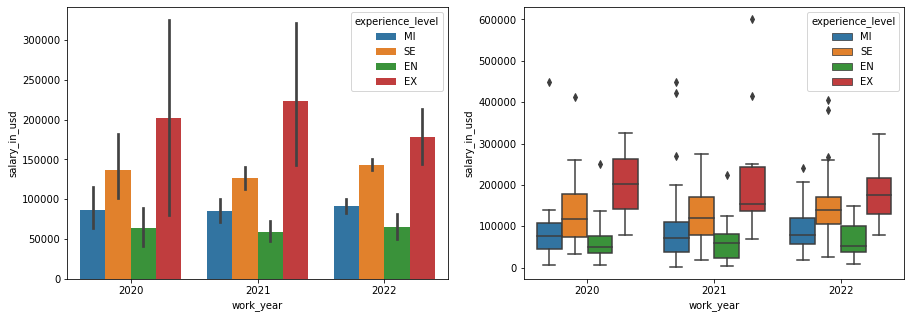

In [18]:
#salary in every year by Exprience_level using bar plot and box plot
# in box plot easyly detect the outlier
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df['work_year'],df['salary_in_usd'],hue=df['experience_level'])
plt.subplot(1,2,2)
sns.boxplot(df['work_year'],df['salary_in_usd'],hue=df['experience_level'])
plt.show()
plt.show()

F:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


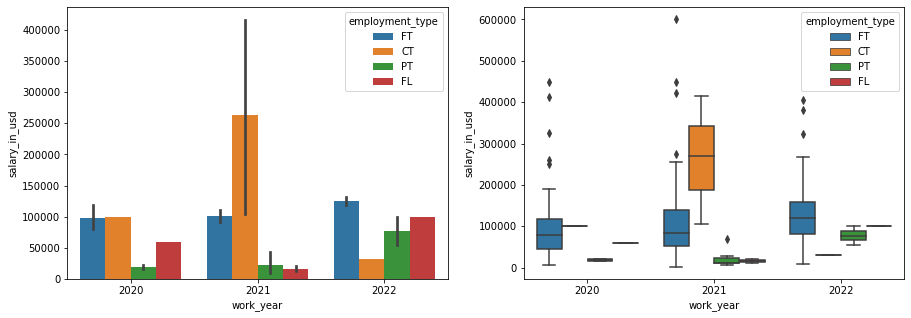

In [19]:
#salary in every year by type of employe using bar plot and box plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df['work_year'],df['salary_in_usd'],hue=df['employment_type'])
plt.subplot(1,2,2)
sns.boxplot(df['work_year'],df['salary_in_usd'],hue=df['employment_type'])
plt.show()

F:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


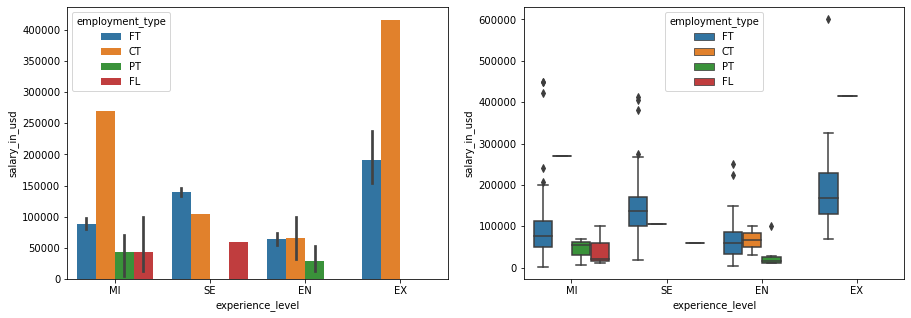

In [20]:
#salary with type of employee by exprience 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df['experience_level'],df['salary_in_usd'],hue=df['employment_type'])
plt.subplot(1,2,2)
sns.boxplot(df['experience_level'],df['salary_in_usd'],hue=df['employment_type'])
plt.show()

F:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


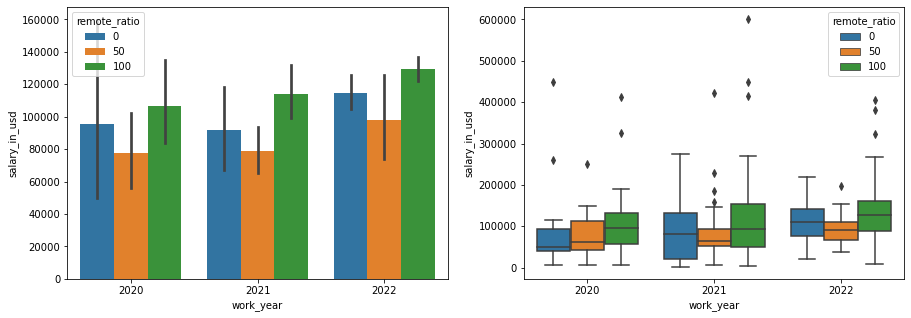

In [21]:
#salary in every year by remote_ratio using bar plot and box plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df['work_year'],df['salary_in_usd'],hue=df['remote_ratio'])
plt.subplot(1,2,2)
sns.boxplot(df['work_year'],df['salary_in_usd'],hue=df['remote_ratio'])
plt.show()

F:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


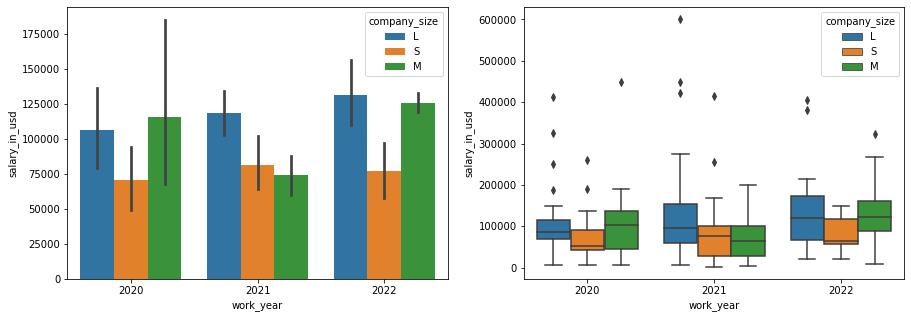

In [22]:
#salary in every year by company siaze using bar plot and box plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df['work_year'],df['salary_in_usd'],hue=df['company_size'])
plt.subplot(1,2,2)
sns.boxplot(df['work_year'],df['salary_in_usd'],hue=df['company_size'])
plt.show()

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel

<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

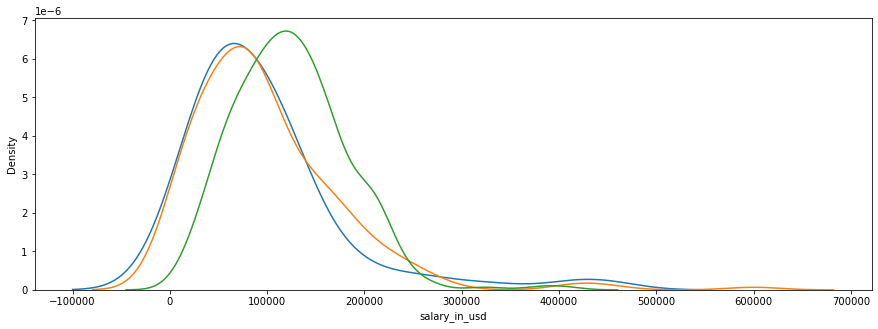

In [23]:
#every yeary salary is increase
plt.figure(figsize=(15,5))
sns.distplot(df[df['work_year']==2020]['salary_in_usd'],hist=False)
sns.distplot(df[df['work_year']==2021]['salary_in_usd'],hist=False)
sns.distplot(df[df['work_year']==2022]['salary_in_usd'],hist=False)

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel

<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

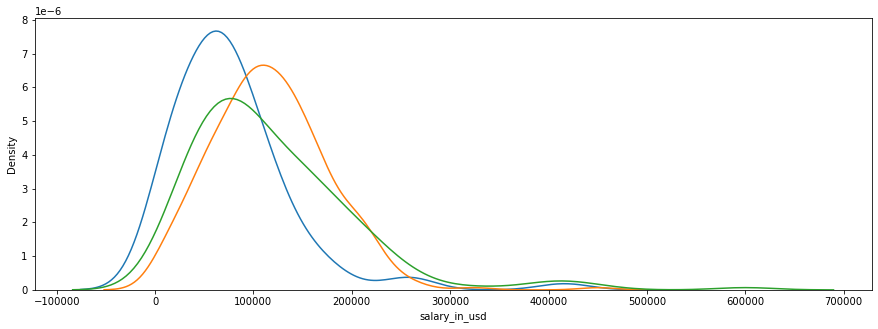

In [24]:
plt.figure(figsize=(15,5))
sns.distplot(df[df['company_size']=="S"]['salary_in_usd'],hist=False)
sns.distplot(df[df['company_size']=="M"]['salary_in_usd'],hist=False)
sns.distplot(df[df['company_size']=="L"]['salary_in_usd'],hist=False)

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel

<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

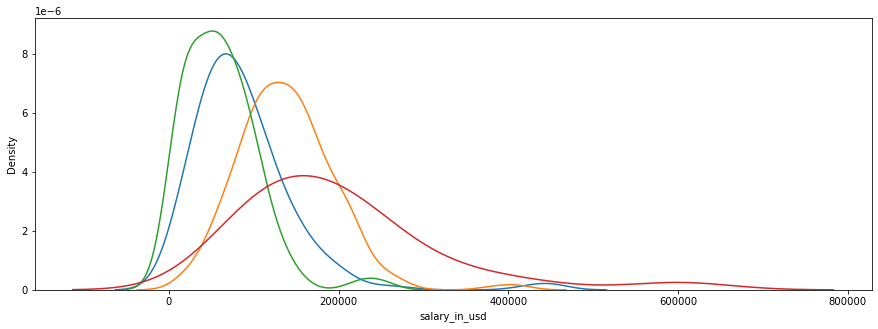

In [25]:
#salary depend on exprience
plt.figure(figsize=(15,5))
sns.distplot(df[df['experience_level']=="MI"]['salary_in_usd'],hist=False)
sns.distplot(df[df['experience_level']=="SE"]['salary_in_usd'],hist=False)
sns.distplot(df[df['experience_level']=="EN"]['salary_in_usd'],hist=False)
sns.distplot(df[df['experience_level']=="EX"]['salary_in_usd'],hist=False)

**Categorical-Categorical**

**Heatmap**:Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values, darker colors are preferred. Heatmap is also defined by the name of the shading matrix.

<AxesSubplot:xlabel='company_size', ylabel='work_year'>

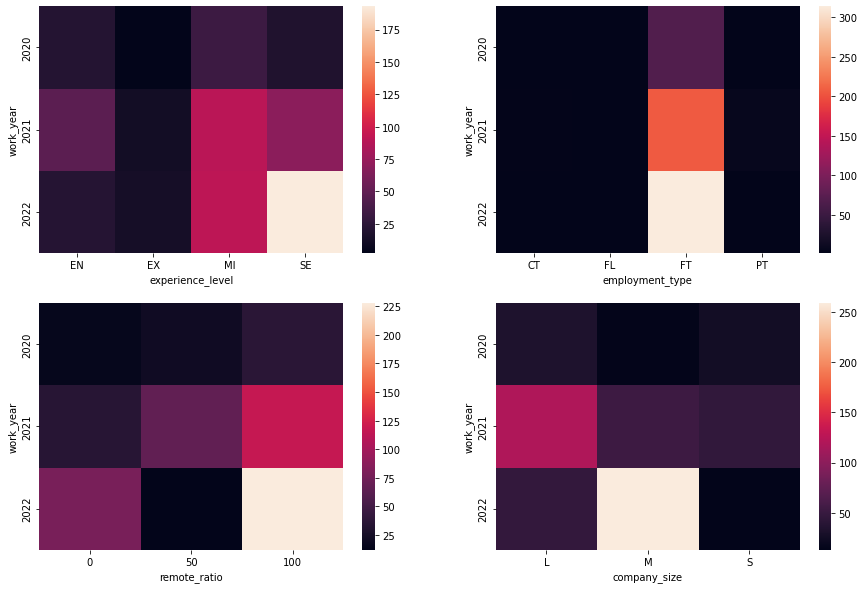

In [26]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
#experience level by year
sns.heatmap(pd.crosstab(df['work_year'],df['experience_level']))
plt.subplot(2,2,2)
#employement_type by year
#FT employee is more in every year
sns.heatmap(pd.crosstab(df['work_year'],df['employment_type']))
plt.subplot(2,2,3)
#remote_ratio by year
sns.heatmap(pd.crosstab(df['work_year'],df['remote_ratio']))
plt.subplot(2,2,4)
#size of companies by year
sns.heatmap(pd.crosstab(df['work_year'],df['company_size']))

**clustermap**:
Clustered heatmaps are superior to ordinary heatmaps as the heatmap cells are arranged in clusters.These clusters are further complemented by the dendograms which provide a summary view of the clusters including the inter cluster distances.

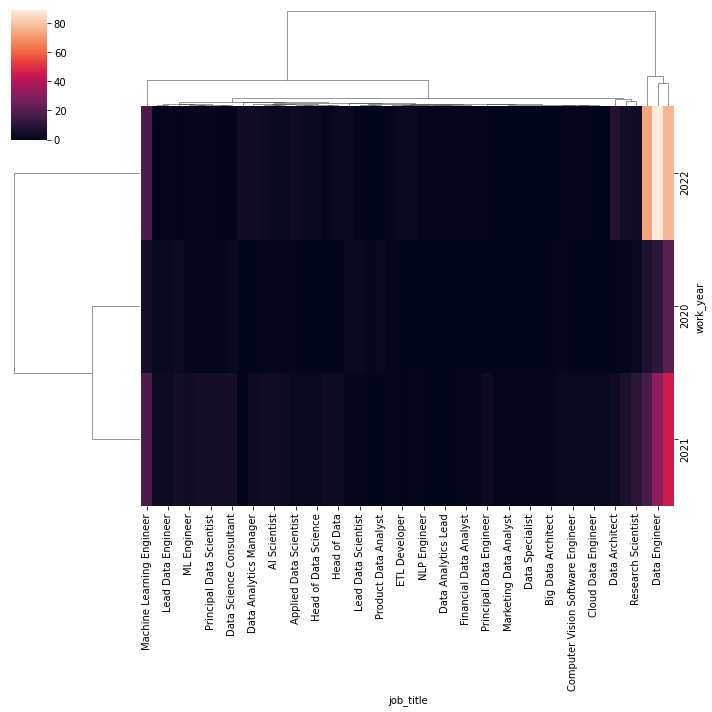

In [27]:
sns.clustermap(pd.crosstab(df['work_year'],df['job_title']))

**pairplot**:Plot pairwise relationships in a dataset.
By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.
It is also possible to show a subset of variables or plot different variables on the rows and columns.
This is a high-level interface for PairGrid that is intended to make it easy to draw a few common styles. You should use PairGrid directly if you need more flexibility.

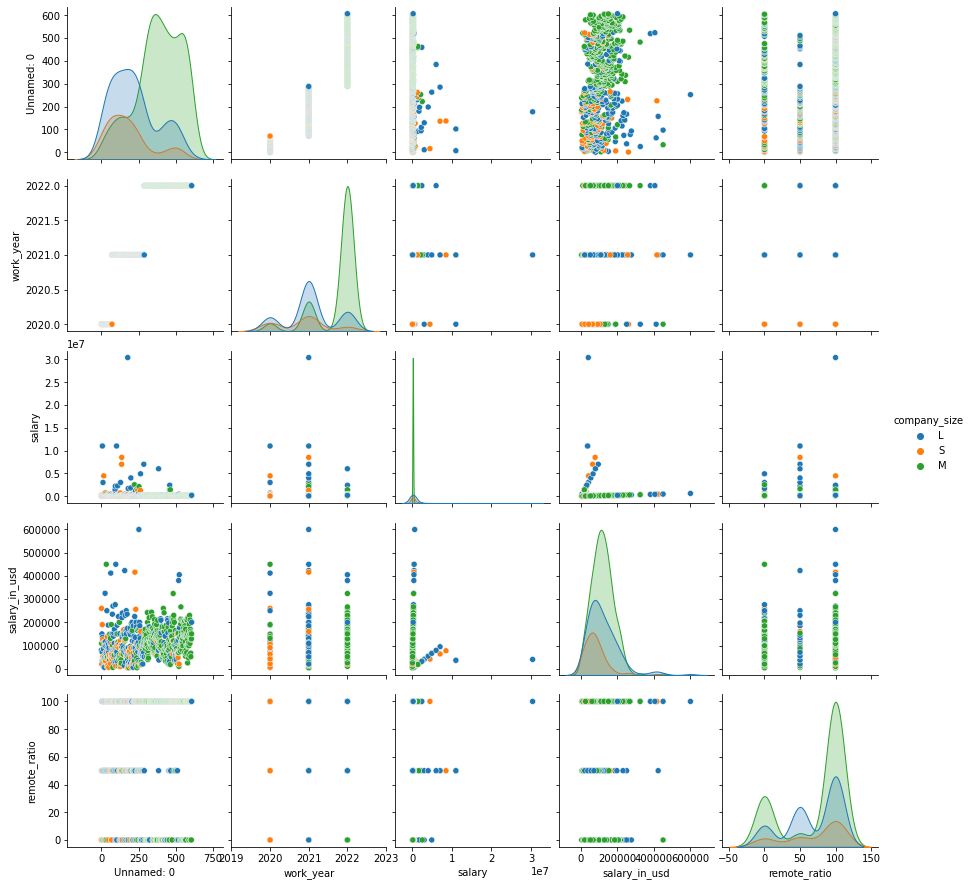

In [28]:
#analyze entire dataset with paitplot
sns.pairplot(df,hue='company_size')

# Analyze with Groupby 
**Pandas groupby**: is used for grouping the data according to the categories and apply a function to the categories. It also helps to aggregate data efficiently.

Pandas dataframe.groupby() function is used to split the data into groups based on some criteria. pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names.

In [29]:
df.groupby(['company_size','experience_level','employment_type']).mean()

Unnamed: 0    work_year  \
company_size experience_level employment_type                            
L            EN               CT                28.000000  2020.000000   
                              FT               216.785714  2021.000000   
             EX               FT               179.181818  2021.000000   
             MI               CT                78.000000  2021.000000   
                              FL               208.000000  2021.000000   
                              FT               198.000000  2020.963415   
                              PT               372.000000  2021.500000   
             SE               FT               253.472222  2021.222222   
M            EN               CT               489.000000  2022.000000   
                              FT               292.423077  2021.346154   
                              PT               241.333333  2021.333333   
             EX               FT               329.916667  2021.833333   
             MI               FL               336.000000  2021.500000   
                              FT               347.989474  2021.621053   
                              PT                77.000000  2021.000000   
             SE               CT               283.000000  2021.000000   
                              FT               424.135135  2021.886486   
S            EN               FT               154.680000  2020.720000   
                              PT               104.750000  2020.500000   
             EX               CT               225.000000  2021.000000   
                              FT               281.000000  2021.500000   
             MI               FT               219.482759  2021.034483   
             SE               FL                54.000000  2020.000000   
                              FT               167.285714  2020.809524   

                                                      salary  salary_in_usd  \
company_size experience_level employment_type                                 
L            EN               CT               100000.000000  100000.000000   
                              FT               282925.000000   71842.285714   
             EX               FT               760000.000000  221942.181818   
             MI               CT               270000.000000  270000.000000   
                              FL                20000.000000   20000.000000   
                              FT               848741.158537   97755.048780   
                              PT                54500.000000   62349.000000   
             SE               FT               432973.569444  147591.013889   
M            EN               CT                29000.000000   31875.000000   
                              FT               260524.769231   52131.730769   
                              PT                40253.333333   40784.666667   
             EX               FT               176572.916667  178241.750000   
             MI               FL                56000.000000   56000.000000   
                              FT               133308.778947   91700.178947   
                              PT               400000.000000    5409.000000   
             SE               CT               105000.000000  105000.000000   
                              FT               137528.227027  137992.978378   
S            EN               FT               324658.880000   69005.200000   
                              PT                56250.000000   19561.000000   
             EX               CT               416000.000000  416000.000000   
                              FT               104500.000000   93964.000000   
             MI               FT               662050.310345   51159.379310   
             SE               FL                60000.000000   60000.000000   
                              FT               148761.904762  118694.666667   

                                               remote_ratio  
compa

<AxesSubplot:xlabel='company_size,experience_level,employment_type'>

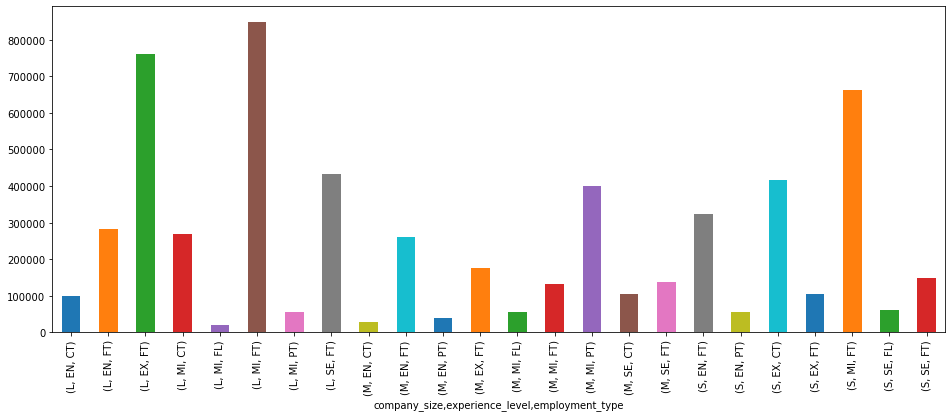

In [30]:
plt.figure(figsize=(16,6))
df.groupby(['company_size','experience_level','employment_type']).mean()['salary'].plot(kind='bar',color=sns.color_palette("tab10"))